# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#pip install citipy

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap and geoapify API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
#for lats, lngs in enumerate(lat_lngs):
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
  

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url+city).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | dankov
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | hafar al-batin
Processing Record 6 of Set 1 | canutama
Processing Record 7 of Set 1 | kolonia
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | mejit
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | farkhar
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | chibougamau
Processing Record 18 of Set 1 | kerikeri
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | georgetown
Proc

Processing Record 38 of Set 4 | inirida
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | mezocsat
Processing Record 41 of Set 4 | laguna
Processing Record 42 of Set 4 | belmopan
Processing Record 43 of Set 4 | tarko-sale
Processing Record 44 of Set 4 | tver
Processing Record 45 of Set 4 | arteche
Processing Record 46 of Set 4 | gebeit
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | balykshi
Processing Record 49 of Set 4 | mushie
Processing Record 0 of Set 5 | ione
Processing Record 1 of Set 5 | mae hong son
Processing Record 2 of Set 5 | nova vicosa
Processing Record 3 of Set 5 | kilindoni
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | willowmore
Processing Record 6 of Set 5 | jasrasar
Processing Record 7 of Set 5 | al bawiti
Processing Record 8 of Set 5 | hami
Processing Record 9 of Set 5 | monrovia
Processing Record 10 of Set 5 | majdanpek
Processing Record 11 of Set 5 | hithadhoo
Processing Record 12 of Set 5 | 'ohonua
Ci

Processing Record 31 of Set 8 | cinarli
Processing Record 32 of Set 8 | flin flon
Processing Record 33 of Set 8 | vadso
Processing Record 34 of Set 8 | kruisfontein
Processing Record 35 of Set 8 | uruzgan
Processing Record 36 of Set 8 | dryden
Processing Record 37 of Set 8 | taroa
Processing Record 38 of Set 8 | holualoa
Processing Record 39 of Set 8 | chadan
Processing Record 40 of Set 8 | les avirons
Processing Record 41 of Set 8 | tvoroyri
Processing Record 42 of Set 8 | hampton bays
Processing Record 43 of Set 8 | axum
Processing Record 44 of Set 8 | arno
Processing Record 45 of Set 8 | baruun-urt
Processing Record 46 of Set 8 | bodaybo
Processing Record 47 of Set 8 | prince george
Processing Record 48 of Set 8 | afaahiti
Processing Record 49 of Set 8 | lagunas
Processing Record 0 of Set 9 | minas de matahambre
City not found. Skipping...
Processing Record 1 of Set 9 | plastun
Processing Record 2 of Set 9 | mili
Processing Record 3 of Set 9 | nouadhibou
Processing Record 4 of Set 9

Processing Record 21 of Set 12 | san patricio
Processing Record 22 of Set 12 | sinan
Processing Record 23 of Set 12 | wattegama
Processing Record 24 of Set 12 | bossangoa
Processing Record 25 of Set 12 | murzuq
Processing Record 26 of Set 12 | fallon
Processing Record 27 of Set 12 | bokovskaya
Processing Record 28 of Set 12 | savanna-la-mar
Processing Record 29 of Set 12 | arvin
Processing Record 30 of Set 12 | nuku'alofa
Processing Record 31 of Set 12 | pyt-yakh
Processing Record 32 of Set 12 | urangan
Processing Record 33 of Set 12 | yamada
Processing Record 34 of Set 12 | tazacorte
Processing Record 35 of Set 12 | arraias
Processing Record 36 of Set 12 | lai
Processing Record 37 of Set 12 | bel ombre
Processing Record 38 of Set 12 | salinas
Processing Record 39 of Set 12 | zouerate
Processing Record 40 of Set 12 | tame
Processing Record 41 of Set 12 | sandpoint
Processing Record 42 of Set 12 | abadan
Processing Record 43 of Set 12 | boa vista
Processing Record 44 of Set 12 | federac

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,10.06,57,40,11.32,CL,1699133223
1,edinburgh of the seven seas,-37.0676,-12.3116,12.25,65,99,11.41,SH,1699133223
2,dankov,53.2515,39.1555,7.90,82,100,7.88,RU,1699133223
3,grytviken,-54.2811,-36.5092,-0.61,73,6,2.68,GS,1699133223
4,hafar al-batin,28.4328,45.9708,23.32,56,0,3.09,SA,1699133223


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,10.06,57,40,11.32,CL,1699133223
1,edinburgh of the seven seas,-37.0676,-12.3116,12.25,65,99,11.41,SH,1699133223
2,dankov,53.2515,39.1555,7.90,82,100,7.88,RU,1699133223
3,grytviken,-54.2811,-36.5092,-0.61,73,6,2.68,GS,1699133223
4,hafar al-batin,28.4328,45.9708,23.32,56,0,3.09,SA,1699133223


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

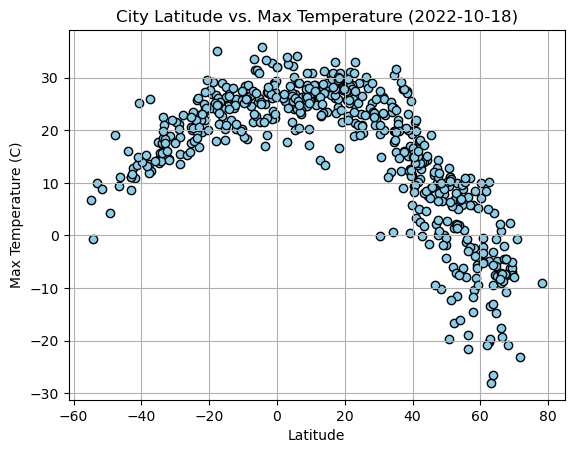

In [9]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True, linestyle='-')
plt.savefig("../output_data/fig1.png")
plt.show()

#### Latitude Vs. Humidity

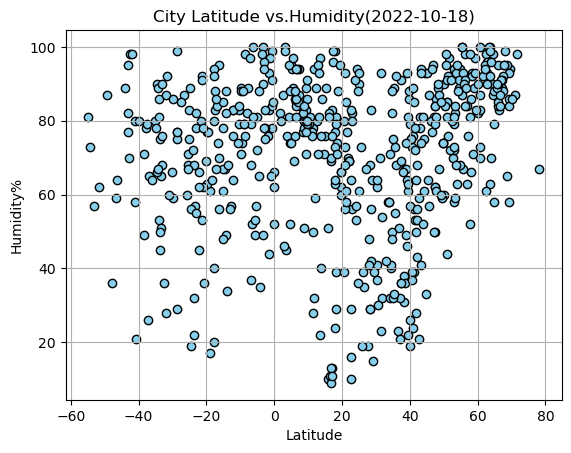

In [10]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs.Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity%")
plt.grid(True, linestyle='-')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

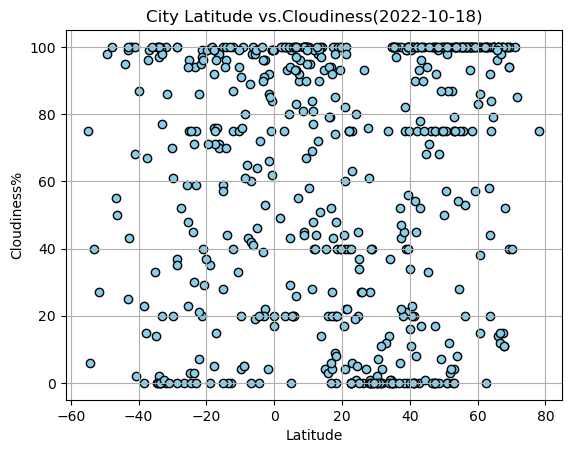

In [11]:
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs.Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")
plt.grid(True, linestyle='-')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

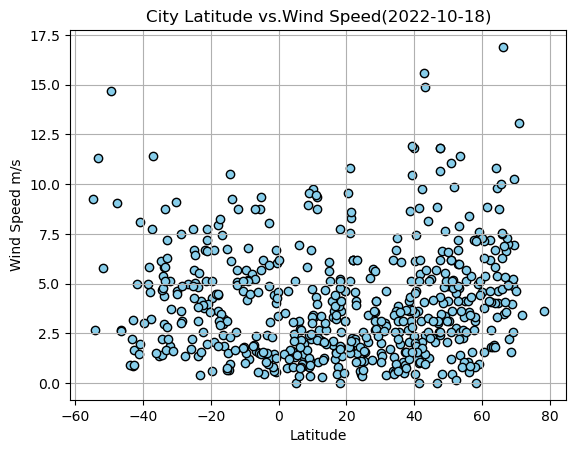

In [12]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs.Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")
plt.grid(True, linestyle='-')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,dankov,53.2515,39.1555,7.90,82,100,7.88,RU,1699133223
4,hafar al-batin,28.4328,45.9708,23.32,56,0,3.09,SA,1699133223
6,kolonia,50.9333,6.9500,11.14,85,0,6.17,DE,1699133224
7,keflavik,64.0049,-22.5624,4.24,70,75,10.80,IS,1699133224
9,mejit,10.2753,170.8646,27.90,77,100,9.74,MH,1699133225


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,10.06,57,40,11.32,CL,1699133223
1,edinburgh of the seven seas,-37.0676,-12.3116,12.25,65,99,11.41,SH,1699133223
3,grytviken,-54.2811,-36.5092,-0.61,73,6,2.68,GS,1699133223
5,canutama,-6.5339,-64.3831,31.46,52,98,1.60,BR,1699133224
8,invercargill,-46.4000,168.3500,11.12,64,50,2.68,NZ,1699133224


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.62x + 36.06
The r-squared is: 0.7341686109317853
The regression displays a linear negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


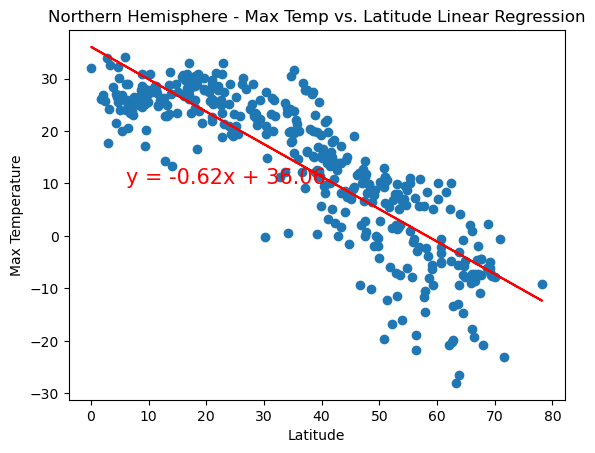

In [40]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
print("The regression displays a linear negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.35x + 28.77
The r-squared is: 0.6163735341388359
The regression displays a linear positive correlation.
In the southern hemisphere, as you move away from the equator the temperature increases.


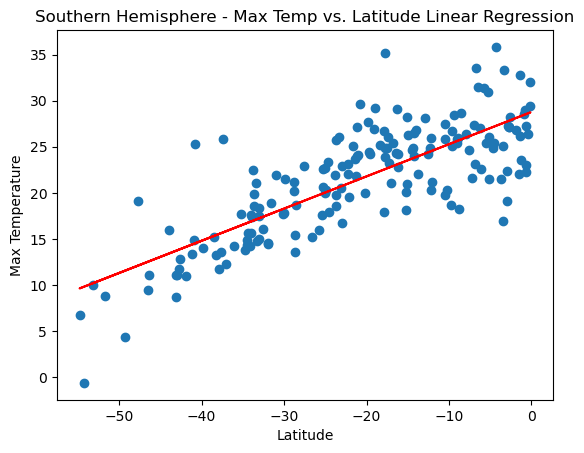

In [43]:
# Linear regression on Southern Hemisphere


x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
print("The regression displays a linear positive correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature increases.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.24x + 62.41
The r-squared is: 0.0460368037993131
The regression displays no correlation.
In the nothern hemisphere,Latitude and Humidity correlation cannot be predicted.


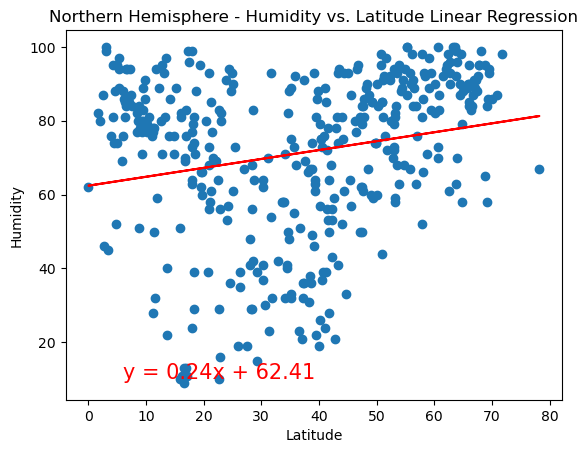

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
print("The regression displays no correlation.")
print("In the nothern hemisphere,Latitude and Humidity correlation cannot be predicted.")
plt.show()

Regression line equation is: y = 0.2x + 74.97
The r-squared is: 0.02062985014220394
The regression displays  no correlation.
In the southern hemisphere, Humidity and Latitude correlation cannot be predicted.


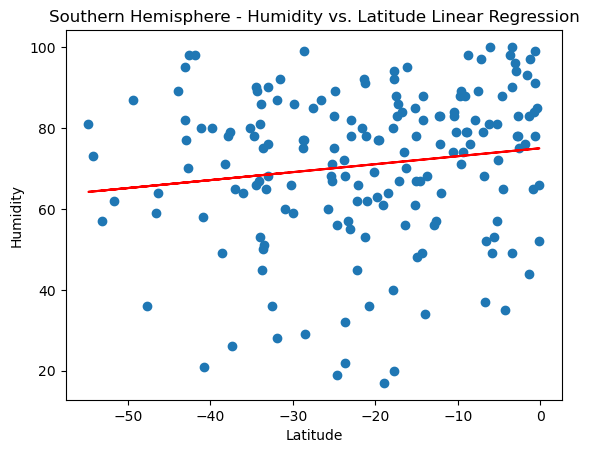

In [47]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
print("The regression displays  no correlation.")
print("In the southern hemisphere, Humidity and Latitude correlation cannot be predicted.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.27x + 51.73
The r-squared is: 0.018334070834836243
The regression displays no correlation.
In the nothern hemisphere,Latitude and Cloudiness correlation cannot be predicted


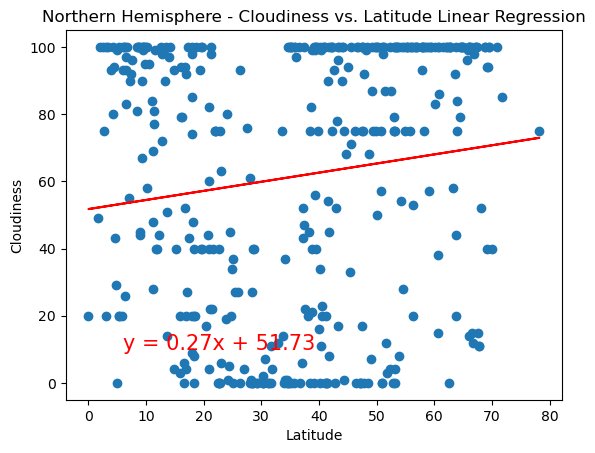

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
print("The regression displays no correlation.")
print("In the nothern hemisphere,Latitude and Cloudiness correlation cannot be predicted")
plt.show()

Regression line equation is: y = 0.26x + 65.05
The r-squared is: 0.009072925314523467
The regression displays  no correlation.
In the southern hemisphere, Cloudiness and Latitude correlation cannot be predicted.


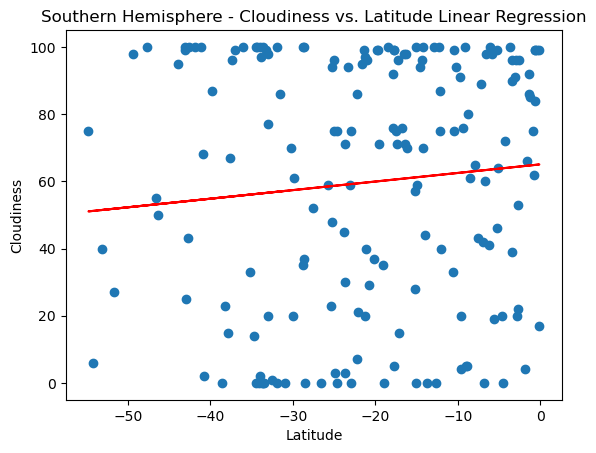

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
print("The regression displays  no correlation.")
print("In the southern hemisphere, Cloudiness and Latitude correlation cannot be predicted.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.04x + 2.42
The r-squared is: 0.07760188997372336
The regression displays no correlation.
In the nothern hemisphere,Wind Speed and Latitude correlation cannot be predicted


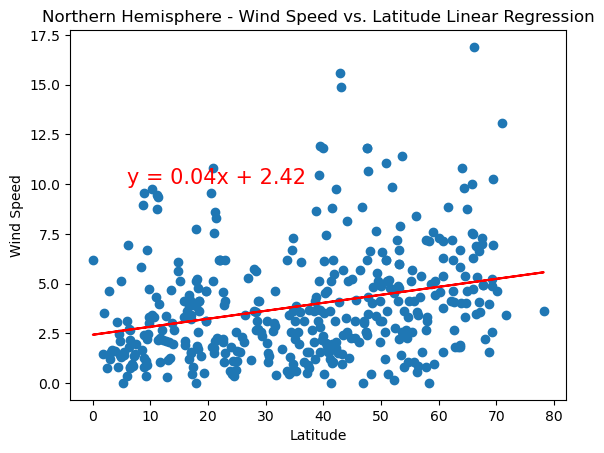

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
print("The regression displays no correlation.")
print("In the nothern hemisphere,Wind Speed and Latitude correlation cannot be predicted")
plt.show()

Regression line equation is: y = -0.04x + 3.38
The r-squared is: 0.03508919294374387
The regression displays  no correlation.
In the southern hemisphere, Wind Speed and Latitude correlation cannot be predicted.


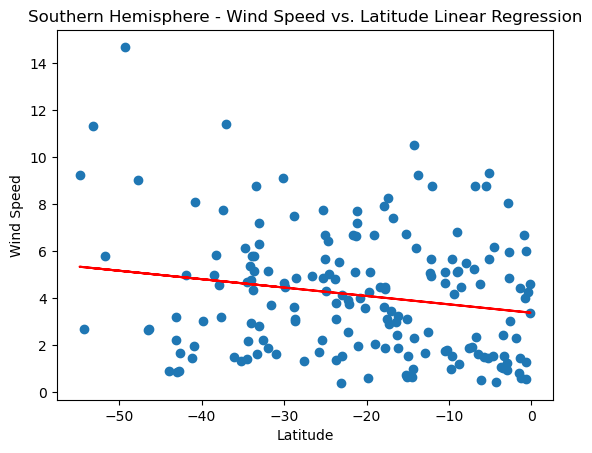

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
print("The regression displays  no correlation.")
print("In the southern hemisphere, Wind Speed and Latitude correlation cannot be predicted.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE